# DBN Structure Inference

The idea is to infer a posterior for the *structure* of a Dynamic Bayesian Network (DBN), given some data.

We formulate this task with the following model:

$$ P(G | X) \propto P(X | G) \cdot P(G) $$

* $P(G)$ is a prior distribution over DBN structures. We'll assume it has the form
$$P(G) \propto \exp \left( -\lambda |G \setminus G^\prime| \right)$$
where $|G \setminus G^\prime|$ denotes the number of edges in the graph, which are not present in some reference graph $G^\prime$.
* $P(X | G)$ is the marginal likelihood of the DBN structure. That is, it's the likelihood of the DBN after the network parameters have been integrated out -- it scores network *structure*. 
* If we assume some reasonable priors for network parameters, $P(X|G)$ can be obtained in closed form. In this work, we'll use the following marginal likelihood:
    
    $$P(X | G) \propto \prod_{i=1}^p (1 + n)^{-(2^{|\pi(i)|} - 1)/2} \left( X_i^{+ T} X_i^+ - \frac{n}{n+1} X_i^{+ T} B_i (B_i^T B_i)^{-1} B_i^T X_i^+ \right)^{-\frac{n}{2}}$$ 
    where $X$ and $B$ are matrices obtained from data; and $n$ is the total number of timesteps in the dataset. This marginal likelihood results from an empirical prior over the regression coefficients, and an improper ($\propto 1/\sigma^2$) prior for the regression "noise" variables.

## Get some data

For now, we'll work with some data used by Hill et al. in their 2012 paper, _Bayesian Inference of Signaling Network Topology in a Cancer Cell Line_.

It gives the differential phosphorylation levels of 20 proteins, in a cancer cell line perturbed by EGF. This is a well-studied signaling pathway; the goal is to produce a graph describing the dependencies between proteins in this pathway. 

NOTE: I have confirmed that the ordering of proteins in `protein_vec` is identical to the ordering in the columns of `timeseries_data`. So we can depend on that.

## Build the model

Implement the graph prior distribution:

$$P(G) \propto \exp \left( -\lambda |G \setminus G^\prime| \right)$$

Implement the DBN's marginal distribution:

$$P(X | G) \propto \prod_{i=1}^p (1 + n)^{-(2^{|\pi(i)|} - 1)/2} \left( X_i^{+ T} X_i^+ - \frac{n}{n+1} X_i^{+ T} B_i (B_i^T B_i)^{-1} B_i^T X_i^+ \right)^{-\frac{n}{2}}$$

Some things to note:
* We're kind of shoe-horning this marginal likelihood into Gen. The probabilistic programming ethos entails modeling the entire data-generating process. This ought to provide better performance during inference, though.

A BUNCH OF HELPER FUNCTIONS:

THE MARGINAL LIKELIHOOD DISTRIBUTION

## Inference

### Metropolis-Hastings over directed graphs

Proposal distribution:

Involution function:

### Our inference program

# TESTING THE NEW MODEL

In [1]:
using Gen
using GLMNet
include("PSDiGraph.jl")
using .PSDiGraphs
include("dbn_preprocessing.jl")
include("dbn_models.jl")
include("dbn_proposals.jl")
include("dbn_inference.jl")
using PyPlot
using Profile
using ProfileView

In [2]:
timeseries_data_path = "data/mukherjee_data.csv"
protein_names_path = "data/protein_names.csv"
reference_adj_path = "data/prior_graph.csv"
timesteps_path = "data/time.csv"

"data/time.csv"

In [3]:
(timeseries_vec, protein_vec, ref_adj, timesteps) = hill_2012_preprocess(timeseries_data_path, 
                                                                         protein_names_path, 
                                                                         reference_adj_path, 
                                                                         timesteps_path);

In [4]:
Gen.load_generated_functions()

In [24]:
clear_caches()
regression_deg = 1
phi_ratio = 1.0
lambda_prior_param = 0.25
n_samples = 1000
fixed_lambda = 3.0
burnin = 10
thinning = 25
lambda_r = 0.5
median_degs = [1.0*sum(ps) for ps in ref_adj];

# edge_posterior, lambdas, lambda_accs, ps_accs = dbn_vertexwise_inference(ref_adj, 
#                                                                          timeseries_vec, 
#                                                                          regression_deg,
#                                                                          phi_ratio,
#                                                                          lambda_prior_param,
#                                                                          n_samples, 
#                                                                          burnin, 
#                                                                          thinning, 
#                                                                          lambda_r, 
#                                                                          median_degs,
#                                                                          fixed_lambda,
#                                                                          false)

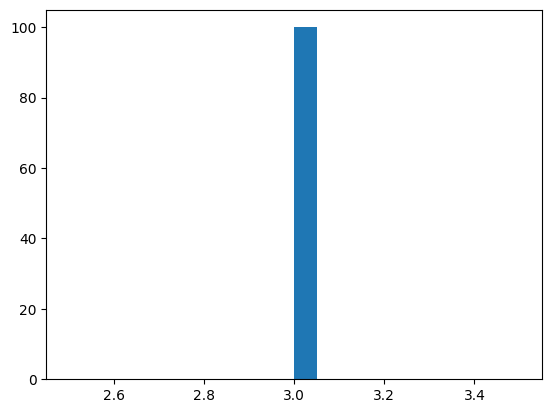

In [16]:
hist(lambdas, bins=20)
show()

In [17]:
transpose(edge_posterior)

20×20 Transpose{Float64,Array{Float64,2}}:
 0.35  0.38  0.01  0.15  0.0   0.21  …  0.09  0.05  0.06  0.01  0.02  0.32
 0.49  0.79  0.03  0.09  0.0   0.33     0.08  0.03  0.11  0.02  0.04  0.27
 0.02  0.01  0.14  0.01  0.04  0.01     0.06  0.1   0.05  0.03  0.33  0.29
 0.01  0.04  0.03  0.41  0.0   0.02     0.01  0.0   0.06  0.01  0.23  0.08
 0.13  0.18  0.06  0.02  0.09  0.03     0.02  0.16  0.26  0.16  0.17  0.03
 0.01  0.0   0.0   0.05  0.0   0.52  …  0.0   0.01  0.06  0.0   0.0   0.24
 0.01  0.04  0.01  0.29  0.0   0.0      0.01  0.09  0.03  0.05  0.02  0.04
 0.03  0.01  0.29  0.02  0.0   0.18     0.06  0.0   0.02  0.02  0.02  0.63
 0.0   0.01  0.08  0.06  0.0   0.01     0.0   0.19  0.45  0.02  0.03  0.3 
 0.07  0.02  0.0   0.01  0.0   0.04     0.02  0.0   0.04  0.01  0.03  0.01
 0.23  0.18  0.0   0.05  0.0   0.02  …  0.01  0.0   0.19  0.14  0.32  0.01
 0.03  0.14  0.1   0.02  0.0   0.03     0.02  0.02  0.06  0.03  0.02  0.08
 0.01  0.0   0.0   0.1   0.05  0.14     0.02  0.01  0.13 

In [18]:
hill_result = convert(Matrix{Float64}, CSV.read("data/edge_prob_matrix.csv"))

20×20 Array{Float64,2}:
 0.11084      0.122596     0.0379205    …  0.178552     0.0571664 
 0.950869     0.997652     0.174526        0.0104266    0.0449605 
 0.00475166   0.00148091   0.0704487       0.147554     0.0489659 
 0.00202306   0.00288393   0.00267562      0.0354861    0.00867835
 0.0196006    0.0426981    0.37382         0.437884     0.00142491
 0.00827803   0.00205783   0.000807644  …  0.000931571  0.0301194 
 0.0493155    0.00467234   0.00351954      0.0112605    0.0049895 
 0.0165201    0.00867707   0.268574        0.00103685   0.950199  
 0.0046717    0.00573582   0.128029        0.000824887  0.0761773 
 0.00333868   0.00139212   0.00388568      0.00624058   0.00295872
 0.0224456    0.0333688    0.00113784   …  0.0199791    0.00190399
 0.00156734   0.00933485   0.0998421       0.000937629  0.00211683
 0.00133807   0.00440722   0.00897539      0.00408237   0.00513697
 0.0259144    0.00207317   0.310454        0.00282329   0.0326157 
 0.0305407    0.0161301    0.0181118  

In [25]:
function phi_ratio_schedule(t::Float64)
    return 1.0 / (1.0 + exp(-30.0*(t - 0.5)))
end

phi_ratio_schedule (generic function with 1 method)

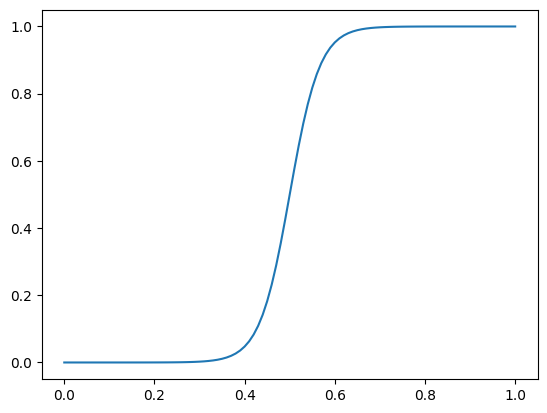

In [26]:
t = collect(0.0:0.01:1.0)
pr = [phi_ratio_schedule(t0) for t0 in t]
plot(t, pr)
show()

In [27]:
clear_caches()
#Profile.clear()

#@profile edge_posterior, ps_accs = dbn_edgeind_annealing_inference(ref_adj, 
edge_posterior, ps_accs = dbn_edgeind_annealing_inference(ref_adj,
                                                          timeseries_vec, 
                                                          regression_deg,
                                                          phi_ratio_schedule,
                                                          fixed_lambda,
                                                          n_samples,
                                                          thinning,  
                                                          median_degs)

([0.358 0.588 … 0.016 0.028; 0.379 0.675 … 0.021 0.035; … ; 0.024 0.017 … 0.298 0.053; 0.467 0.308 … 0.05 0.281], [0.33268, 0.33044, 0.27544, 0.31468, 0.26704, 0.26488, 0.28232, 0.26716, 0.27924, 0.29288, 0.34752, 0.2506, 0.396, 0.283, 0.2998, 0.29576, 0.392, 0.312, 0.3374, 0.39984])

In [28]:
transpose(edge_posterior)

20×20 Transpose{Float64,Array{Float64,2}}:
 0.358  0.379  0.019  0.151  0.019  …  0.073  0.092  0.022  0.024  0.467
 0.588  0.675  0.058  0.076  0.008     0.068  0.163  0.036  0.017  0.308
 0.029  0.023  0.21   0.012  0.055     0.043  0.043  0.053  0.31   0.268
 0.021  0.046  0.013  0.427  0.015     0.019  0.023  0.058  0.17   0.098
 0.218  0.243  0.051  0.042  0.177     0.179  0.212  0.252  0.233  0.048
 0.009  0.015  0.003  0.077  0.004  …  0.006  0.07   0.011  0.013  0.201
 0.021  0.029  0.029  0.326  0.007     0.085  0.027  0.053  0.053  0.026
 0.05   0.034  0.336  0.04   0.007     0.008  0.034  0.02   0.015  0.475
 0.023  0.038  0.106  0.025  0.013     0.193  0.389  0.065  0.036  0.343
 0.092  0.045  0.019  0.01   0.006     0.014  0.029  0.023  0.035  0.019
 0.199  0.181  0.01   0.022  0.013  …  0.012  0.224  0.302  0.3    0.021
 0.052  0.104  0.072  0.028  0.01      0.049  0.052  0.039  0.053  0.118
 0.029  0.027  0.02   0.117  0.115     0.021  0.12   0.017  0.013  0.182
 0.123  

In [29]:
hill_result

20×20 Array{Float64,2}:
 0.11084      0.122596     0.0379205    …  0.178552     0.0571664 
 0.950869     0.997652     0.174526        0.0104266    0.0449605 
 0.00475166   0.00148091   0.0704487       0.147554     0.0489659 
 0.00202306   0.00288393   0.00267562      0.0354861    0.00867835
 0.0196006    0.0426981    0.37382         0.437884     0.00142491
 0.00827803   0.00205783   0.000807644  …  0.000931571  0.0301194 
 0.0493155    0.00467234   0.00351954      0.0112605    0.0049895 
 0.0165201    0.00867707   0.268574        0.00103685   0.950199  
 0.0046717    0.00573582   0.128029        0.000824887  0.0761773 
 0.00333868   0.00139212   0.00388568      0.00624058   0.00295872
 0.0224456    0.0333688    0.00113784   …  0.0199791    0.00190399
 0.00156734   0.00933485   0.0998421       0.000937629  0.00211683
 0.00133807   0.00440722   0.00897539      0.00408237   0.00513697
 0.0259144    0.00207317   0.310454        0.00282329   0.0326157 
 0.0305407    0.0161301    0.0181118  

In [ ]:
typeof(Gen.NoChange())

In [ ]:
clear_caches()

In [ ]:
ProfileView.view()

In [ ]:
clear_caches()
burnin = 20
thinning = 20
n_samples = 10
Profile.clear()
#@profile edge_posterior, edge_accs = dbn_edgeind_gibbs_inference(ref_adj, 
edge_posterior, edge_accs = dbn_edgeind_gibbs_inference(ref_adj,
                                                        timeseries_vec, 
                                                        regression_deg,
                                                        phi_ratio,
                                                        fixed_lambda,
                                                        n_samples,
                                                        burnin,
                                                        thinning)

In [ ]:
edge_posterior

In [ ]:
ProfileView.view()

In [ ]:
[[3]; [true for i=1:10]]

In [ ]:
sum([true for i=1:10])

In [ ]:
using Pkg

In [ ]:
Pkg.add("FunctionalCollections")

In [ ]:
using FunctionalCollections

In [ ]:
v = PersistentVector{Float64}()

In [ ]:
y = convert(Vector{Float64}, v)

In [ ]:
v = PersistentVector{Float64}([1.0, 2.0, 3.0])

In [ ]:
y = Vector{Float64}([x for x in v])

In [ ]:
Bool(1)

In [ ]:
timeseries_vec

In [ ]:
t = convert(Matrix{Float64}, timesteps)
t = t[1,:]

In [ ]:
# for ts_array in timeseries_vec
#     plot(t, ts_array)
for ts_array in timeseries_vec
    plot(t, ts_array, linewidth=0.5)
end
xlim(5,240)
#yscale("log")
show()